<a href="https://colab.research.google.com/github/comojin1994/Deep_Learning_Study/blob/master/Kaggle/Global_Wheat_Detection/%20SWA_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd ./drive/My\ Drive/Kaggle/Global_Wheat_Detection/input/global-wheat-detection/

/content/drive/My Drive/Kaggle/Global_Wheat_Detection/input/global-wheat-detection


In [0]:
# !unzip global-wheat-detection.zip

In [0]:
# !unzip train_aug.zip

In [5]:
%cd ..

/content/drive/My Drive/Kaggle/Global_Wheat_Detection/input


In [6]:
%cd ..

/content/drive/My Drive/Kaggle/Global_Wheat_Detection


In [7]:
%cd output/

/content/drive/My Drive/Kaggle/Global_Wheat_Detection/output


In [8]:
!ls

Data_Augmentation_Tutorial.ipynb
Global_Wheat_Detection_FasterRCNN_resnet50fpn.ipynb
Global_Wheat_Detection_FasterRCNN_resnet50_Inference.ipynb
Global_Wheat_Detection_FasterRCNN_ResNext101.ipynb


In [10]:
!pip install torchcontrib

  Created wheel for torchcontrib: filename=torchcontrib-0.0.2-cp36-none-any.whl size=7533 sha256=6358c98e42f6108fb6071b8f56f4243260f8e99f62d21a1e2e6b9b477a616c5e
  Stored in directory: /root/.cache/pip/wheels/06/06/7b/a5f5920bbf4f12a2c927e438fac17d4cd9560f8336b00e9a99
Successfully built torchcontrib


# Load Moulde & Data

In [0]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from tqdm import tqdm

import cv2

import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor, FasterRCNN
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone
from torchvision import transforms
from torchcontrib.optim import SWA

import torch.utils.data
from torch.utils.data import Dataset, DataLoader
import random

In [0]:
os.listdir('../input/global-wheat-detection')

train_dir = '../input/global-wheat-detection/train/'
test_dir = '../input/global-wheat-detection/test'

df_train = pd.read_csv('../input/global-wheat-detection/train.csv')

In [13]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


# EDA

In [0]:
# print(df_train.head())
# print(df_train.shape)

In [0]:
# print(len(df_train['image_id'].unique()))
# print((df_train.shape[0]) / len(df_train['image_id'].unique()))

In [0]:
# print('Image_id v/s # of bounding boxes')
# print(df_train['image_id'].value_counts())

In [0]:
# df_train[df_train['image_id']=='86296fc32']

In [0]:
# print('Height')
# print(df_train['height'].value_counts())
# print('Width')
# print(df_train['width'].value_counts())

In [0]:
list_image_ids_df = list(df_train['image_id'].unique())
list_image_ids_dir = os.listdir('../input/global-wheat-detection/train/')

In [20]:
len(list_image_ids_dir) - len(list_image_ids_df)

1

In [21]:
for col in df_train.columns:
    if sum(df_train[col].isnull()) == 1:
        print(col + ' has null values')
    else:
        print(col + ' no null values')

image_id no null values
x_min no null values
y_min no null values
x_max no null values
y_max no null values
width no null values
height no null values
area no null values
source no null values


In [22]:
df_train.head()

,image_id,x_min,y_min,x_max,y_max,width,height,area,source
0,b6ab77fd7,834.0,222.0,890.0,258.0,56.0,36.0,2016.0,usask_1
1,b6ab77fd7,226.0,548.0,356.0,606.0,130.0,58.0,7540.0,usask_1
2,b6ab77fd7,377.0,504.0,451.0,664.0,74.0,160.0,11840.0,usask_1
3,b6ab77fd7,834.0,95.0,943.0,202.0,109.0,107.0,11663.0,usask_1
4,b6ab77fd7,26.0,144.0,150.0,261.0,124.0,117.0,14508.0,usask_1


In [0]:
# df_train['x0'] = df_train['bbox'].map(lambda x: x[1:-1].split(',')[0]).astype(float)
# df_train['y0'] = df_train['bbox'].map(lambda x: x[1:-1].split(',')[1]).astype(float)
# df_train['w'] = df_train['bbox'].map(lambda x: x[1:-1].split(',')[2]).astype(float)
# df_train['h'] = df_train['bbox'].map(lambda x: x[1:-1].split(',')[3]).astype(float)
# df_train['x1'] = df_train['x0'] + df_train['w']
# df_train['y1'] = df_train['y0'] + df_train['h']

In [0]:
# df_train.head()

In [25]:
for col in df_train.columns:
    if sum(df_train[col].isnull()) == 1:
        print(col + ' has null values')
    else:
        print(col + ' no null values')

image_id no null values
x_min no null values
y_min no null values
x_max no null values
y_max no null values
width no null values
height no null values
area no null values
source no null values


In [26]:
df_train.dtypes

image_id     object
x_min       float64
y_min       float64
x_max       float64
y_max       float64
width       float64
height      float64
area        float64
source       object
dtype: object

In [0]:
# cols_to_be_selected = ['image_id', 'x0', 'y0', 'x1', 'y1']
df1_train = df_train

In [28]:
len(df1_train['image_id'].unique())

6745

In [0]:
val_percentage = 0.2
num_val_images = int(len(df1_train['image_id'].unique()) * val_percentage)
num_train_images = len(df1_train['image_id'].unique()) - num_val_images
list_val_imageid = list(df1_train['image_id'].unique())[:num_val_images]
list_train_imageid = list(df1_train['image_id'].unique())[(-1) * num_train_images:]

In [30]:
print('Number of validation images: ', num_val_images)
print('Number of training images: ', num_train_images)
print(num_val_images + num_train_images)

Number of validation images:  1349
Number of training images:  5396
6745


In [0]:
df2_val = df1_train.loc[df1_train['image_id'].isin(list_val_imageid), :]
df2_train = df1_train.loc[df1_train['image_id'].isin(list_train_imageid), :]

# DataLoader

In [0]:
def get_transform():
    list_transforms = []
    list_transforms.append(transforms.ToTensor())
    return transforms.Compose(list_transforms)

In [0]:
class GlobalWheatDetectionDataset(torch.utils.data.Dataset):
    def __init__(self, input_df, input_dir, transforms=None):
        
        self.df = input_df
        self.list_images = list(self.df['image_id'].unique())
        self.image_dir = input_dir
        self.transforms = transforms
        
    def __getitem__(self, idx):
        cols_to_be_selected = ['x_min', 'y_min', 'x_max', 'y_max']
        img_id = self.list_images[idx]
        bboxes_array = np.array(self.df.loc[self.df['image_id'] == img_id, cols_to_be_selected])
        boxes = torch.tensor(bboxes_array, dtype=torch.int64)
        
        num_boxes = self.df.loc[self.df['image_id'] == img_id].shape[0]
        labels = torch.ones(num_boxes, dtype=torch.int64)
        
        area = torch.tensor(np.array(self.df['area']), dtype=torch.int64)
        
        iscrowd = torch.zeros(num_boxes, dtype=torch.uint8)
        
        target = {}
        target['boxes'] = boxes
        target['labels'] = labels
        target['area'] = area
        target['iscrowd'] = iscrowd
        
        img = cv2.imread(self.image_dir + '/' + img_id + '.jpg')
        img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_scaled = img_RGB/255.0
        img_final = img_scaled
        
        if self.transforms is not None:
            img_final = self.transforms(img_final)
            
        return img_final, target, img_id
    
    def __len__(self):
        return len(self.df['image_id'].unique())

In [0]:
train_dataset = GlobalWheatDetectionDataset(df2_train, train_dir, get_transform())
val_dataset = GlobalWheatDetectionDataset(df2_val, train_dir, get_transform())

In [35]:
len(train_dataset), len(val_dataset)

(5396, 1349)

In [0]:
def collate_fn(batch):
    return tuple(zip(*batch))

In [0]:
train_dataloader = DataLoader(
    train_dataset,
    batch_size = 16,
    shuffle = True,
    num_workers = 4,
    collate_fn = collate_fn
)

val_dataloader = DataLoader(
    val_dataset,
    batch_size = 16,
    shuffle = False,
    num_workers = 4,
    collate_fn = collate_fn
)

# Callbacks

In [0]:
def checkpoints(best_loss, current_loss, epoch, initalization=True):
    if initalization:
        if epoch < 5:
            return max(best_loss, current_loss)

    if best_loss > current_loss:
        best_loss = current_loss
        torch.save(model.state_dict(), f'../input/checkpoints/best{epoch}_{best_loss}.pth')
    return best_loss

def earlyStopping(best_loss, current_loss, cnt, threshold=10):
    flag = False
    if best_loss < current_loss:
        cnt += 1
    
    if cnt >= threshold:
        flag = True
    return cnt, flag

## Example

In [0]:
image, target, image_id = train_dataset[-100]
image = image.to(device)

In [0]:
image.shape

torch.Size([3, 1024, 1024])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


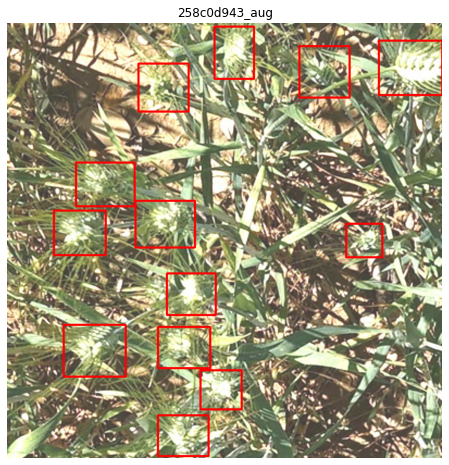

In [0]:
boxes = target['boxes'].cpu().numpy().astype(np.int32)
sample = image.permute(1, 2, 0).cpu().numpy().astype(np.float32)
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

for box in boxes:
    cv2.rectangle(sample,
                 (box[0], box[1]),
                 (box[2], box[3]),
                 (255, 0, 0), 3)
    
ax.set_axis_off()
ax.title.set_text(image_id)
ax.imshow(sample)
plt.show()

# Model(ResNet)

In [0]:
def get_instance_objectdetection_model(num_classes, path_weight):
    create_model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False, pretrained_backbone=False)
    
    in_features = create_model.roi_heads.box_predictor.cls_score.in_features
    
    create_model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    create_model.load_state_dict(torch.load(path_weight, map_location=torch.device('cpu')))
    
    return create_model

In [0]:
path_weight = '../input/fasterrcnn/fasterrcnn_resnet50_fpn_best.pth'
# path_weight = '../input/checkpoints/best8_0.6875392135451822.pth'

In [0]:
num_classes = 2
model = get_instance_objectdetection_model(num_classes, path_weight)

In [42]:
torch.cuda.empty_cache()
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequent

# Model(ResNext)

In [0]:
def fasterrcnn_resnext101_fpn(pretrained=False, progress=True,
                            num_classes=2, pretrained_backbone=True,
                             trainable_backbone_layers=3, **kwargs):
    assert trainable_backbone_layers <= 5 and trainable_backbone_layers >= 0
    if not (pretrained or pretrained_backbone):
        trainable_backbone_layers = 5
    if pretrained:
        pretrained_backbone = False
    backbone = resnet_fpn_backbone('resnext101_32x8d', pretrained_backbone)
    model = FasterRCNN(backbone, num_classes, **kwargs)
    return model

In [0]:
def initialize_model(pretrained):
    model = fasterrcnn_resnext101_fpn(pretrained=pretrained)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 2)
    return model

In [0]:
model = initialize_model(pretrained=True)

In [0]:
saved_model_path = './customtrained_fasterrcnn_resnext101_fpn.pth'

In [0]:
model.load_state_dict(torch.load(saved_model_path))

<All keys matched successfully>

In [0]:
torch.cuda.empty_cache()
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downs

# Model(ResNet50)

In [0]:
def fasterrcnn_resnet101_fpn(pretrained=False, progress=True,
                            num_classes=2, pretrained_backbone=True,
                             trainable_backbone_layers=3, **kwargs):
    assert trainable_backbone_layers <= 5 and trainable_backbone_layers >= 0
    if not (pretrained or pretrained_backbone):
        trainable_backbone_layers = 5
    if pretrained:
        pretrained_backbone = False
    backbone = resnet_fpn_backbone('resnet101', pretrained_backbone)
    model = FasterRCNN(backbone, num_classes, **kwargs)
    return model

In [0]:
def initialize_model(pretrained):
    model = fasterrcnn_resnet101_fpn(pretrained=pretrained)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 2)
    return model

In [0]:
model = initialize_model(pretrained=True)

In [0]:
saved_model_path = '../input/checkpoints/best1_1.2370089599366725.pth'

In [0]:
model.load_state_dict(torch.load(saved_model_path))

<All keys matched successfully>

In [0]:
torch.cuda.empty_cache()
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequent

# Training

In [0]:
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

# base_optim = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
# optimizer = SWA(base_opt, swa_start=10, swa_freq=2, swa_lr=0.00005)

lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)
# lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer)
num_epochs = 3

In [43]:
itr = 1
best_loss = np.float('inf')
flag = False
cnt = 0
hist_train_loss = []
hist_val_loss = []


for epoch in range(1, num_epochs + 1):
    model.train()
    loss_sum = 0
    num_iterations = 0
    for images, targets, image_ids in tqdm(train_dataloader):
        
        images = list(image.to(device, dtype=torch.float) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        
        loss_dict = model(images, targets)
        
        losses = sum(loss for loss in loss_dict.values())
        loss_value = losses.item()
        
        loss_sum = loss_sum + loss_value
        num_iterations = num_iterations + 1
        
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        
        # if itr % 10 == 0:
        #     print(f'Iteration #{itr} loss: {loss_value}')
            
        itr += 1
        
    if num_iterations > 0:
        loss_avg_value = loss_sum / num_iterations
    
    hist_train_loss.append(loss_avg_value)
    print('\nEpoch' + '#' + str(epoch) + ' loss: ' + str(loss_avg_value))


    val_loss = 0
    val_itr = 0
    with torch.no_grad():
        for images, targets, image_ids in tqdm(val_dataloader):

            images = list(image.to(device, dtype=torch.float) for image in images)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            loss_dict = model(images, targets)

            losses = sum(loss for loss in loss_dict.values())
            loss_value = losses.item()

            val_loss = val_loss + loss_value
            val_itr += 1
        
        if val_itr > 0:
            avg_val_loss = val_loss / val_itr
        
        hist_val_loss.append(avg_val_loss)
        print('Val loss: ', avg_val_loss)
    
    if lr_scheduler is not None:
        lr_scheduler.step()

    best_loss = checkpoints(best_loss, avg_val_loss, epoch, initalization=True)
    cnt, flag = earlyStopping(best_loss, avg_val_loss, cnt)
    if flag:
        torch.save(model.state_dict(), f'../input/checkpoints/Last_Epoch_{epoch}_{best_loss}.pth')
        break

# optimizer.swap_swa_sgd()
print('Train End')

  0%|          | 0/338 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)
  0%|          | 0/85 [00:00<?, ?it/s]


Epoch#1 loss: 0.5934952250599156


100%|██████████| 85/85 [03:10<00:00,  2.24s/it]

Val loss:  0.6643421411514282


TypeError: ignored

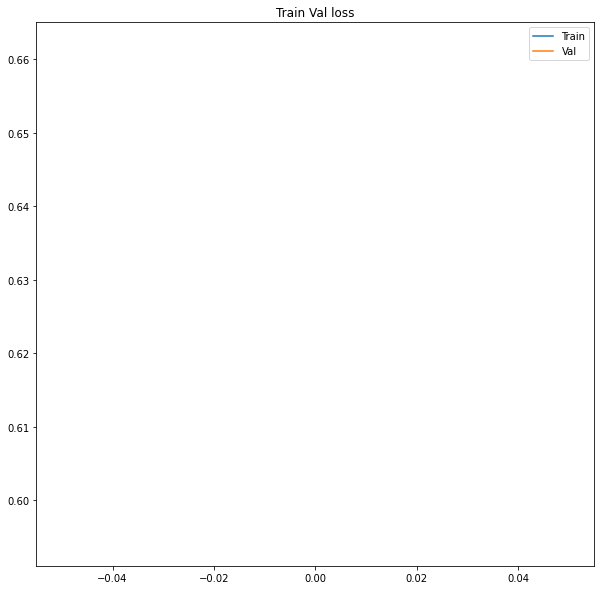

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.plot(np.arange(epoch), hist_train_loss, label='Train')
ax.plot(np.arange(epoch), hist_val_loss, label='Val')
ax.legend()
ax.title.set_text('Train Val loss')

plt.show()

In [0]:
# torch.save(model.state_dict(), './customtrained_fasterrcnn_resnext101_fpn.pth')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


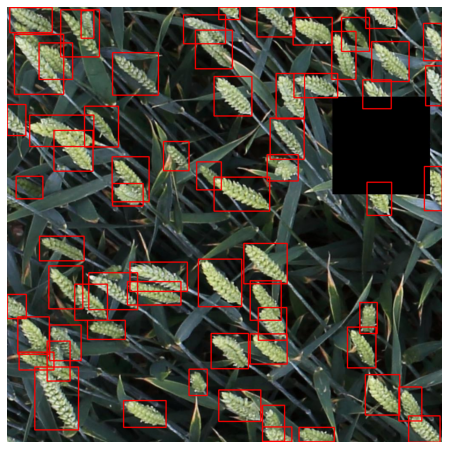

In [0]:
model.eval()
images, targets, image_ids = next(iter(train_dataloader))
        
images = list(image.to(device, dtype=torch.float) for image in images)
targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

outputs = model(images, targets)

sample = images[1].permute(1, 2, 0).cpu().numpy()
boxes = outputs[1]['boxes'].data.cpu().numpy()
scores = outputs[1]['scores'].data.cpu().numpy()

boxes = boxes[scores >= 0.7].astype(np.int32)

fig, ax = plt.subplots(1, 1, figsize = (16, 8))

for box in boxes:
  cv2.rectangle(sample, 
                (box[0], box[1]),
                (box[2], box[3]),
                (220, 0, 0), 2)
  
ax.set_axis_off()
ax.imshow(sample)